In [79]:
import numpy as np 
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data
from torch.autograd import Variable
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

import torchvision.datasets as datasets

In [80]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [81]:
# let’s initialize the CIFAR train and test set.
cifar_trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
cifar_testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [82]:
train_batch_size = 4
test_batch_size = 4

In [83]:
train_loader = torch.utils.data.DataLoader(
                 dataset=cifar_trainset,
                 batch_size=train_batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(
                dataset=cifar_testset,
                batch_size=test_batch_size, shuffle=False)

In [84]:
dataiter = iter(train_loader)
X_batch, y_batch = dataiter.next()

print(X_batch.shape)
print(y_batch.shape)
len(train_loader.dataset), len(test_loader.dataset)

torch.Size([4, 3, 32, 32])
torch.Size([4])


(50000, 10000)

  f r o g


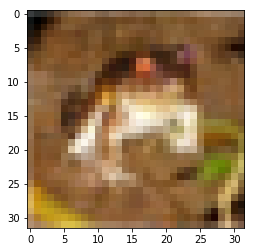

t r u c k


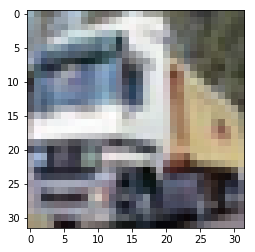

t r u c k


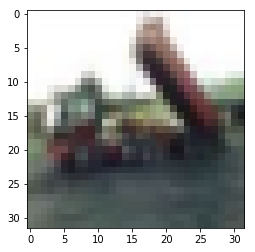

  d e e r


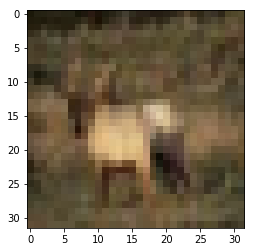

In [85]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Showing random images from the batch
def imshow(img):
    for i in range(train_batch_size):
        img[i] = img[i] / 2 + 0.5     # unnormalize
        plt.imshow(img[i].numpy().transpose(1, 2, 0))
        print(' '.join('%5s' % classes[y_batch[i]]))
        plt.show()
          
imshow(X_batch)

In [86]:
train_batch_size = 5000
test_batch_size = 1000

In [87]:
train_loader = torch.utils.data.DataLoader(
                 dataset=cifar_trainset,
                 batch_size=train_batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(
                dataset=cifar_testset,
                batch_size=test_batch_size, shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [55]:
#VGG-8
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=(1, 1))
        self.conv2 = nn.Conv2d(32, 32, kernel_size=3, padding=(1, 1))
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=(1, 1))
        self.conv4 = nn.Conv2d(64, 64, kernel_size=3, padding=(1, 1))
        self.conv5 = nn.Conv2d(64, 128, kernel_size=3, padding=(1, 1))
        self.conv6 = nn.Conv2d(128, 128, kernel_size=3, padding=(1, 1))
        self.maxpool = nn.MaxPool2d(2, stride=2)
        self.fc1 = nn.Linear(128 * 4 * 4, 256)
        self.fc2 = nn.Linear(256, 120)
        self.fc3 = nn.Linear(120, 10)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.maxpool(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = self.maxpool(F.relu(self.conv4(x)))
        x = F.relu(self.conv5(x))
        x = self.maxpool(F.relu(self.conv6(x)))
        x = x.view(-1, 128 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.log_softmax(self.fc3(x), dim=1) 
        return x

cnn = CNN()
print(cnn)

CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv6): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2048, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=10, bias=True)
)


In [68]:
#MLP

input_size = 1024*3
hidden_layer = [250, 100]
output_size = 10

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_layer[0])
        self.linear2 = nn.Linear(hidden_layer[0], hidden_layer[1])
        self.linear3 = nn.Linear(hidden_layer[1], output_size)
    
    def forward(self,X):
        X = F.relu(self.linear1(X))
        X = F.relu(self.linear2(X))
        X = F.softmax(self.linear3(X), dim=1)
        return X
 
mlp = MLP()
print(mlp)

MLP(
  (linear1): Linear(in_features=3072, out_features=250, bias=True)
  (linear2): Linear(in_features=250, out_features=100, bias=True)
  (linear3): Linear(in_features=100, out_features=10, bias=True)
)


In [69]:
def evaluate(model, test_loader):
#model = cnn

    correct = 0 
    model.eval()
    
    for batch_idx, (X_batch, y_batch) in enumerate(test_loader):
        
        # wrapping tensors in variables,  If x is a Variable then x.data is a Tensor giving its value, 
        # and x.grad is another Variable holding the gradient of x with respect to some scalar value
        var_X_batch = Variable(X_batch).float()
        var_y_batch = Variable(y_batch)
        
        var_X_batch = torch.reshape(var_X_batch, (test_batch_size, 1024*3))
        
        # output of the model
        output = model.forward(var_X_batch)
                        
        # Calculating the loss 
        # cross entropy function
        error = nn.CrossEntropyLoss()
        loss = error(output, var_y_batch)
            
        predicted = torch.max(output,1)[1]
        
        correct += (predicted == var_y_batch).sum()
        test_accuracy = float(correct*100) / (len(test_loader)*test_batch_size)
    
        test_cost = loss.data
        
    return test_accuracy, test_cost

In [70]:
def fit(model, train_loader, test_loader, epochs, optimizer, loss):
    
    model.train()
    
    epochs_list = []
    
    
    train_accuracy_list = []
    train_loss_list = []
    
    test_accuracy_list = []
    test_loss_list = []
    
    if optimizer == 'Adam': 
        # Adam optimizer
        optimizer = torch.optim.Adam(model.parameters()) # lr=0.001, betas=(0.9,0.999))
    
    if loss == 'CrossEntropy':
        # cross entropy function
        error = nn.CrossEntropyLoss()
        
    for epoch in range(epochs):
                
        correct = 0
        for batch_idx, (X_batch, y_batch) in enumerate(train_loader):
            
            # wrapping tensors in variables,  If x is a Variable then x.data is a Tensor giving its value, 
            # and x.grad is another Variable holding the gradient of x with respect to some scalar value
            var_X_batch = Variable(X_batch).float()
            var_y_batch = Variable(y_batch)
            
            var_X_batch = torch.reshape(var_X_batch, (train_batch_size, 1024*3))
            
            # we need to set the gradients to zero before starting to do backpropragation
            optimizer.zero_grad()
            
            # output of the model
            output = model.forward(var_X_batch)
                        
            # Calculating the loss 
            loss = error(output, var_y_batch)
            train_cost = loss.data
            
            # Let's do backpropogation, it will calculate all the gradients and save to x.grad
            loss.backward()
            
            # Performs a single optimization step,  
            #parameter update based on the current gradient (stored in .grad attribute of a parameter) and the update rule
            optimizer.step()
            
            # Total correct predictions
            predicted = torch.max(output.data, 1)[1] 
            correct += (predicted == var_y_batch).sum()
            train_accuracy = float(correct*100) / float(train_batch_size*(batch_idx+1))
            
            #Evaluate
            test_accuracy, test_cost = evaluate(model, test_loader)
        
        epochs_list.append(epoch)
        
        # Training accuracy and cost
        
        train_loss_list.append(train_cost)
        train_accuracy_list.append(train_accuracy)
        
        # Testing accuracy and cost
        
        test_loss_list.append(test_cost)
        test_accuracy_list.append(test_accuracy)
        
        print('Epoch : {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\t Accuracy:{:.3f}%'.format(
            epoch+1, 
            (batch_idx+1)*(len(X_batch)), 
            len(train_loader.dataset), 
            100.*(batch_idx+1) / len(train_loader), 
            train_cost, 
            train_accuracy))
                                                  
    # accuracy Plot
    train_accuracy_array = np.array(train_accuracy_list)
    y_train_accuracy = train_accuracy_array.reshape(-1, 1)
    
    test_accuracy_array = np.array(test_accuracy_list)
    y_test_accuracy = test_accuracy_array.reshape(-1, 1)

    # Loss Plot
    train_loss_array = np.array(train_loss_list)
    y_train_loss = train_loss_array.reshape(-1, 1)
    
    test_loss_array = np.array(test_loss_list)
    y_test_loss = test_loss_array.reshape(-1, 1)
    
    x_epochs = np.array(epochs_list).reshape(-1, 1)
                                                  
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(x_epochs, y_train_loss, label='Training loss')
    plt.plot(x_epochs, y_test_loss, label='Testing loss')
    plt.xlabel('epochs')
    plt.ylabel('Loss')
    plt.title('epochs_vs_loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(x_epochs, y_train_accuracy, label='Training accuracy')
    plt.plot(x_epochs, y_test_accuracy, label='Testing accuracy')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.title('epochs_vs_accuracy')
    plt.legend()
    
    fig1 = plt.gcf()
    plt.show()

Epoch : 1 [50000/50000 (100%)]	Loss: 2.170078	 Accuracy:23.546%
Epoch : 2 [50000/50000 (100%)]	Loss: 2.111876	 Accuracy:32.306%
Epoch : 3 [50000/50000 (100%)]	Loss: 2.089812	 Accuracy:36.410%
Epoch : 4 [50000/50000 (100%)]	Loss: 2.066579	 Accuracy:38.700%
Epoch : 5 [50000/50000 (100%)]	Loss: 2.040961	 Accuracy:41.244%
Epoch : 6 [50000/50000 (100%)]	Loss: 2.025624	 Accuracy:43.076%
Epoch : 7 [50000/50000 (100%)]	Loss: 2.009840	 Accuracy:44.712%
Epoch : 8 [50000/50000 (100%)]	Loss: 1.995253	 Accuracy:46.338%
Epoch : 9 [50000/50000 (100%)]	Loss: 1.983188	 Accuracy:47.826%
Epoch : 10 [50000/50000 (100%)]	Loss: 1.971878	 Accuracy:48.970%
Epoch : 11 [50000/50000 (100%)]	Loss: 1.963184	 Accuracy:50.200%
Epoch : 12 [50000/50000 (100%)]	Loss: 1.953933	 Accuracy:51.146%
Epoch : 13 [50000/50000 (100%)]	Loss: 1.946058	 Accuracy:52.056%
Epoch : 14 [50000/50000 (100%)]	Loss: 1.941545	 Accuracy:52.616%
Epoch : 15 [50000/50000 (100%)]	Loss: 1.941991	 Accuracy:52.648%
Epoch : 16 [50000/50000 (100%)]	Lo

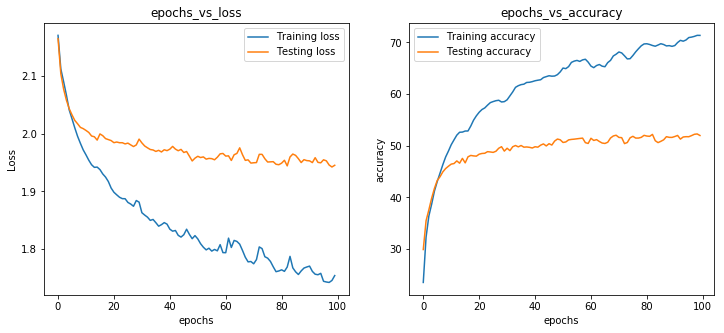

In [71]:
fit(mlp, train_loader, test_loader, epochs=100, optimizer='Adam', loss='CrossEntropy')

In [73]:
#MLP

input_size = 1024*3
hidden_layer = 250
output_size = 10

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_layer)
        self.linear2 = nn.Linear(hidden_layer, output_size)
    
    def forward(self,X):
        X = F.relu(self.linear1(X))
        X = F.softmax(self.linear2(X), dim=1)
        return X
 
mlp_2 = MLP()
print(mlp_2)

MLP(
  (linear1): Linear(in_features=3072, out_features=250, bias=True)
  (linear2): Linear(in_features=250, out_features=10, bias=True)
)


Epoch : 1 [50000/50000 (100%)]	Loss: 2.130453	 Accuracy:26.342%
Epoch : 2 [50000/50000 (100%)]	Loss: 2.089149	 Accuracy:35.696%
Epoch : 3 [50000/50000 (100%)]	Loss: 2.066959	 Accuracy:38.854%
Epoch : 4 [50000/50000 (100%)]	Loss: 2.045152	 Accuracy:41.104%
Epoch : 5 [50000/50000 (100%)]	Loss: 2.029443	 Accuracy:43.076%
Epoch : 6 [50000/50000 (100%)]	Loss: 2.013492	 Accuracy:44.762%
Epoch : 7 [50000/50000 (100%)]	Loss: 2.001089	 Accuracy:46.392%
Epoch : 8 [50000/50000 (100%)]	Loss: 1.989100	 Accuracy:47.814%
Epoch : 9 [50000/50000 (100%)]	Loss: 1.976926	 Accuracy:49.208%
Epoch : 10 [50000/50000 (100%)]	Loss: 1.965554	 Accuracy:50.462%
Epoch : 11 [50000/50000 (100%)]	Loss: 1.955460	 Accuracy:51.564%
Epoch : 12 [50000/50000 (100%)]	Loss: 1.946065	 Accuracy:52.570%
Epoch : 13 [50000/50000 (100%)]	Loss: 1.937707	 Accuracy:53.506%
Epoch : 14 [50000/50000 (100%)]	Loss: 1.929492	 Accuracy:54.426%
Epoch : 15 [50000/50000 (100%)]	Loss: 1.922320	 Accuracy:55.148%
Epoch : 16 [50000/50000 (100%)]	Lo

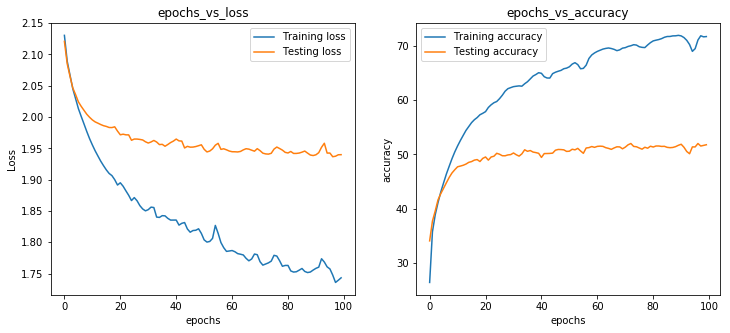

In [74]:
fit(mlp_2, train_loader, test_loader, epochs=100, optimizer='Adam', loss='CrossEntropy')

In [75]:
#VGG-8
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=(1, 1))
        self.conv2 = nn.Conv2d(32, 32, kernel_size=3, padding=(1, 1))
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=(1, 1))
        self.conv4 = nn.Conv2d(64, 64, kernel_size=3, padding=(1, 1))
        self.conv5 = nn.Conv2d(64, 128, kernel_size=3, padding=(1, 1))
        self.conv6 = nn.Conv2d(128, 128, kernel_size=3, padding=(1, 1))
        self.maxpool = nn.MaxPool2d(2, stride=2)
        self.fc1 = nn.Linear(128 * 4 * 4, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 10)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.maxpool(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = self.maxpool(F.relu(self.conv4(x)))
        x = F.relu(self.conv5(x))
        x = self.maxpool(F.relu(self.conv6(x)))
        x = x.view(-1, 128 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.log_softmax(self.fc3(x), dim=1) 
        return x

cnn_2 = CNN()
print(cnn_2)

CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv6): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2048, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
)


In [88]:
def evaluate_CNN(model, test_loader):
#model = cnn

    correct = 0 
    model.eval()
    
    for batch_idx, (X_batch, y_batch) in enumerate(test_loader):
        
        # wrapping tensors in variables,  If x is a Variable then x.data is a Tensor giving its value, 
        # and x.grad is another Variable holding the gradient of x with respect to some scalar value
        var_X_batch = Variable(X_batch).float()
        var_y_batch = Variable(y_batch)
        
        # output of the model
        output = model.forward(var_X_batch)
                        
        # Calculating the loss 
        # cross entropy function
        error = nn.CrossEntropyLoss()
        loss = error(output, var_y_batch)
            
        predicted = torch.max(output,1)[1]
        
        correct += (predicted == var_y_batch).sum()
        test_accuracy = float(correct*100) / (len(test_loader)*test_batch_size)
    
        test_cost = loss.data
        
    return test_accuracy, test_cost

In [89]:
def fit_CNN(model, train_loader, test_loader, epochs, optimizer, loss):
    
    model.train()
    
    epochs_list = []
    
    train_accuracy_list = []
    train_loss_list = []
    
    test_accuracy_list = []
    test_loss_list = []
    
    if optimizer == 'Adam': 
        # Adam optimizer
        optimizer = torch.optim.Adam(model.parameters()) # lr=0.001, betas=(0.9,0.999))
    
    if loss == 'CrossEntropy':
        # cross entropy function
        error = nn.CrossEntropyLoss()
        
    for epoch in range(epochs):
                
        correct = 0
        for batch_idx, (X_batch, y_batch) in enumerate(train_loader):
            
            # wrapping tensors in variables,  If x is a Variable then x.data is a Tensor giving its value, 
            # and x.grad is another Variable holding the gradient of x with respect to some scalar value
            var_X_batch = Variable(X_batch).float()
            var_y_batch = Variable(y_batch)
                        
            # we need to set the gradients to zero before starting to do backpropragation
            optimizer.zero_grad()
            
            # output of the model
            output = model.forward(var_X_batch)
                        
            # Calculating the loss 
            loss = error(output, var_y_batch)
            train_cost = loss.data
            
            # Let's do backpropogation, it will calculate all the gradients and save to x.grad
            loss.backward()
            
            # Performs a single optimization step,  
            #parameter update based on the current gradient (stored in .grad attribute of a parameter) and the update rule
            optimizer.step()
            
            # Total correct predictions
            predicted = torch.max(output.data, 1)[1] 
            correct += (predicted == var_y_batch).sum()
            train_accuracy = float(correct*100) / float(train_batch_size*(batch_idx+1))
            
            #Evaluate
            test_accuracy, test_cost = evaluate_CNN(model, test_loader)
        
        epochs_list.append(epoch)
        
        # Training accuracy and cost
        
        train_loss_list.append(train_cost)
        train_accuracy_list.append(train_accuracy)
        
        # Testing accuracy and cost
        
        test_loss_list.append(test_cost)
        test_accuracy_list.append(test_accuracy)
        
        print('Epoch : {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\t Accuracy:{:.3f}%'.format(
            epoch+1, 
            (batch_idx+1)*(len(X_batch)), 
            len(train_loader.dataset), 
            100.*(batch_idx+1) / len(train_loader), 
            train_cost, 
            train_accuracy))
                                                  
    # accuracy Plot
    train_accuracy_array = np.array(train_accuracy_list)
    y_train_accuracy = train_accuracy_array.reshape(-1, 1)
    
    test_accuracy_array = np.array(test_accuracy_list)
    y_test_accuracy = test_accuracy_array.reshape(-1, 1)

    # Loss Plot
    train_loss_array = np.array(train_loss_list)
    y_train_loss = train_loss_array.reshape(-1, 1)
    
    test_loss_array = np.array(test_loss_list)
    y_test_loss = test_loss_array.reshape(-1, 1)
    
    x_epochs = np.array(epochs_list).reshape(-1, 1)
                                                  
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(x_epochs, y_train_loss, label='Training loss')
    plt.plot(x_epochs, y_test_loss, label='Testing loss')
    plt.xlabel('epochs')
    plt.ylabel('Loss')
    plt.title('epochs_vs_loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(x_epochs, y_train_accuracy, label='Training accuracy')
    plt.plot(x_epochs, y_test_accuracy, label='Testing accuracy')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.title('epochs_vs_accuracy')
    plt.legend()
    
    fig1 = plt.gcf()
    plt.show()

Epoch : 1 [50000/50000 (100%)]	Loss: 2.188635	 Accuracy:15.568%
Epoch : 2 [50000/50000 (100%)]	Loss: 2.016872	 Accuracy:22.832%
Epoch : 3 [50000/50000 (100%)]	Loss: 1.905290	 Accuracy:27.470%
Epoch : 4 [50000/50000 (100%)]	Loss: 1.757820	 Accuracy:31.630%
Epoch : 5 [50000/50000 (100%)]	Loss: 1.662867	 Accuracy:35.738%
Epoch : 6 [50000/50000 (100%)]	Loss: 1.616153	 Accuracy:38.980%
Epoch : 7 [50000/50000 (100%)]	Loss: 1.593161	 Accuracy:39.282%
Epoch : 8 [50000/50000 (100%)]	Loss: 1.501041	 Accuracy:42.724%
Epoch : 9 [50000/50000 (100%)]	Loss: 1.854542	 Accuracy:43.150%
Epoch : 10 [50000/50000 (100%)]	Loss: 1.498343	 Accuracy:42.704%
Epoch : 11 [50000/50000 (100%)]	Loss: 1.413200	 Accuracy:45.704%
Epoch : 12 [50000/50000 (100%)]	Loss: 1.373582	 Accuracy:48.088%
Epoch : 13 [50000/50000 (100%)]	Loss: 1.329067	 Accuracy:49.598%
Epoch : 14 [50000/50000 (100%)]	Loss: 1.297150	 Accuracy:51.440%
Epoch : 15 [50000/50000 (100%)]	Loss: 1.271702	 Accuracy:52.454%
Epoch : 16 [50000/50000 (100%)]	Lo

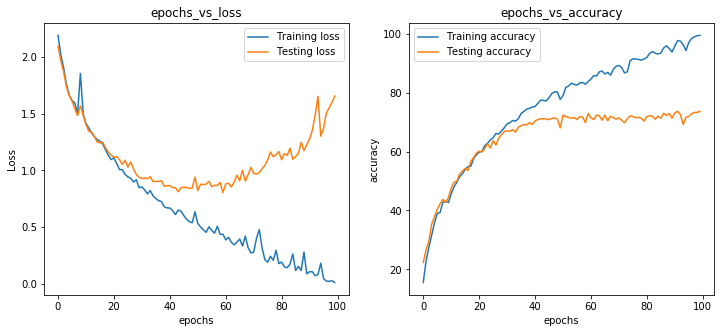

In [90]:
fit_CNN(cnn_2, train_loader, test_loader, epochs=100, optimizer='Adam', loss='CrossEntropy')